In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot3 as up3
import pandas as pd

In [2]:
# Global parameters:

run = "run1"
dp_mass = 0.05 

In [3]:
global_vars = [
    "run_number",
    "subrun_number",
    "event_number",
    "reco_asso_showers",
    "reco_asso_tracks",
    "reco_vertex_x",
    "reco_vertex_y",
    "reco_vertex_z",
    "reco_slice_objects",
    "reco_slice_nuscore",
    "sss_candidate_min_dist",
]

shower_vars = [
    "reco_shower_length",
    "reco_shower_opening_angle",
    "reco_shower_startx",
    "reco_shower_starty",
    "reco_shower_startz",
    "reco_shower_start_dist_to_SCB",
    "reco_shower_end_dist_to_SCB",
    "reco_shower_conversion_distance",
    "reco_shower_impact_parameter",
    "reco_shower_energy_max",
    "reco_shower_nuscore", #the neutrino score of the slice containing the reco shower
    "reco_shower_trackscore",
    "reco_shower_theta_yz",
    "reco_shower_phi_yx",
    "reco_shower_dirx",
    "reco_shower_diry",
    "reco_shower_dirz",
    "reco_shower_implied_dirx",
    "reco_shower_implied_diry",
    "reco_shower_implied_dirz",
    "reco_shower_dEdx_plane0_max",
    "reco_shower_dEdx_plane1_max",
    "reco_shower_dEdx_plane2_max"
]

track_vars = [
    "reco_track_dirx",
    "reco_track_diry",
    "reco_track_dirz",
    "reco_track_startx",
    "reco_track_starty",
    "reco_track_startz",
    "reco_track_endx",
    "reco_track_endy",
    "reco_track_endz",
    "reco_track_start_dist_to_SCB",
    "reco_track_end_dist_to_SCB",
    "reco_track_theta_yz",
    "reco_track_phi_yx",
    "reco_track_calo_energy_max",
    "reco_track_proton_kinetic_energy",
    "reco_track_dEdx_plane0",
    "reco_track_dEdx_plane1",
    "reco_track_dEdx_plane2",
    "reco_track_nuscore",
    "reco_track_isclearcosmic",
    "reco_track_is_nuslice" 
    
]
    

In [4]:
def TreetoPandas(input_file):
    try: 
        input_tree = up3.open(input_file)["vertex_tree"]
    except:
        input_tree = up3.open(input_file)["singlephotonana"]["vertex_tree"]
    df = input_tree.pandas.df(global_vars + shower_vars + track_vars, flatten=False)
    return df 

In [5]:
# Open input files 

base_dir = "/uboone/data/users/lmoralep/sp_files/"
nu_overlay_file = run + "_nu_overlay_slimmed_1shower_1track.root"
dirt_overlay_file = run + "_dirt_slimmed_1shower_1track.root"
beamoff_file = run + "_beamoff_slimmed_1shower_1track.root"
signal_file = "dt_overlay_0.05_slimmed_1shower_1track.root"

nu_overlay_df = TreetoPandas(base_dir + nu_overlay_file) 
dirt_overlay_df = TreetoPandas(base_dir + dirt_overlay_file)
beamoff_df = TreetoPandas(base_dir + beamoff_file)
signal_df = TreetoPandas(base_dir + signal_file )

/uboone/app/users/lmoralep/dark_trident_env/lib64/python3.6/site-packages/awkward0/array/base.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


In [6]:
def get_scalar(df, var):
    col  = df.loc[:,var].reset_index(drop=True)
    for i in range(len(df)):
            col[i] = col[i].item()
    df.loc[:,var] = col.values.astype(float)

In [7]:
selected_var = "reco_shower_dirx"

In [8]:
get_scalar(nu_overlay_df, selected_var)
get_scalar(dirt_overlay_df, selected_var)
get_scalar(beamoff_df,selected_var)
get_scalar(signal_df,selected_var)

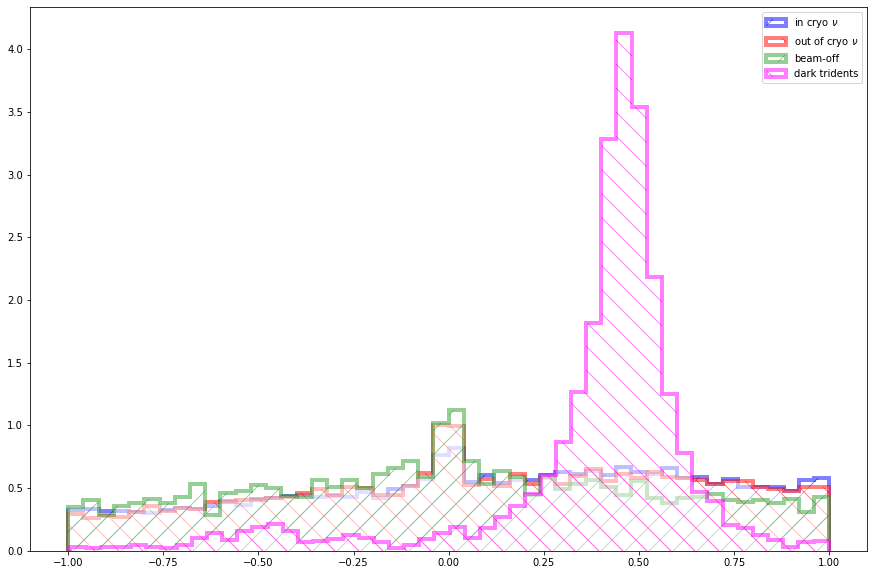

In [9]:
plt.figure(figsize=(15,10))
plt.hist(nu_overlay_df[selected_var],bins=50,histtype='step',linewidth=4, 
         hatch='/', facecolor='white',edgecolor='blue',fill=True,density=True,alpha=0.5, label=r'in cryo $\nu$')
plt.hist(dirt_overlay_df[selected_var],bins=50, histtype='step',linewidth=4,
         hatch=' \ ', facecolor='white',edgecolor='red',fill=True, density=True,alpha=0.5, label=r'out of cryo $\nu$')
plt.hist(beamoff_df[selected_var],bins=50, histtype='step',linewidth=4,
         hatch=' / ', facecolor='white',fill=True, density=True,alpha=0.5, label = r'beam-off')
plt.hist(signal_df[selected_var],bins=50, histtype='step',linewidth=4,
         hatch=' \ ', facecolor='white', edgecolor = 'magenta',fill=True, density=True,alpha=0.5,label = r'dark tridents')
plt.legend()
#plt.xlim(0.,500.)
plt.show()